<a href="https://colab.research.google.com/github/teegwende/WQPandEntitiesDensity/blob/main/genergraphEvalV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from pandas import read_csv, DataFrame
import pandas as pd


def formationJeuDonnees(scenario):

  df = read_csv('/gdrive/MyDrive/traitement_mathematique/scenarii/'+scenario+'.csv' ,index_col='period', parse_dates=True)
  df["Taux"] = df["Mollusques infectés"] / (df["Mollusques infectés"] + df["Mollusques susceptibles"])
  leR0=read_csv('/gdrive/MyDrive/traitement_mathematique/scenarii/lesR0.csv')
  leR0=leR0[scenario][0]

  ###RECUPERATION DES PARAMS
  dfPH = read_csv('/gdrive/MyDrive/traitement_ordinaire/ResultSimulationML/PH_.csv',index_col=None)
  dfTemp = read_csv('/gdrive/MyDrive/traitement_ordinaire/ResultSimulationML/Temp.csv')
  dfDO=read_csv('/gdrive/MyDrive/traitement_ordinaire/ResultSimulationML/Do.csv')
  dfEC=read_csv('/gdrive/MyDrive/traitement_ordinaire/ResultSimulationML/Ec.csv')
  dfDates=read_csv('/gdrive/MyDrive/traitement_ordinaire/ResultSimulationML/lesdates.csv')

  # params=pd.DataFrame()
  params=pd.concat([dfDates,dfPH,dfTemp,dfDO,dfEC],axis=1)
  params =params.loc[:,~params.columns.str.contains("Unnamed")]
  params.columns=['periode','PH','TEMP','DO','EC']

  df=df.loc[(df.index>="2017-01-01") & (df.index<="2017-03-31")]

  for col in params.columns:
    df[col]=params[col].values
  print(leR0)
  return df,leR0

dfresult,r0=formationJeuDonnees("scenario6")
display(dfresult.head(10))

0


,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,PH,TEMP,DO,EC
period,,,,,,,,,,,,,,
2017-01-01,31,2770.095417,299.052299,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,7.045870,24.025543,4.981674,125.031930
2017-01-02,32,2780.092255,289.189153,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,7.052754,24.022625,4.979781,125.035934
2017-01-03,33,2789.765611,279.649483,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,7.056235,24.026749,4.978826,125.026930
2017-01-04,34,2799.124371,270.424403,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,7.057829,24.025501,4.980041,125.032490
2017-01-05,35,2808.177338,261.505109,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,7.043320,24.019169,4.980765,125.014680
2017-01-06,36,2816.933238,252.882874,0.0,39.087399,24.435181,0.0,36,0.384669,2017-01-06,7.049341,24.005215,4.981410,125.030130
2017-01-07,37,2825.400719,244.549053,0.0,39.102434,24.401267,0.0,37,0.384250,2017-01-07,7.054698,24.024157,4.980374,125.036160
2017-01-08,38,2833.588348,236.495078,0.0,39.117448,24.367400,0.0,38,0.383830,2017-01-08,7.039505,24.006908,4.983015,125.039440
2017-01-09,39,2841.504611,228.712461,0.0,39.132441,24.333580,0.0,39,0.383411,2017-01-09,7.042169,24.029467,4.981433,125.041504


In [ ]:
#Affaiblissement


def affaiblissement(listemasses,alpha=0):
  # print(listemasses["A"],listemasses["B"],listemasses["A_B"])
  listemassesAffaiblies={} 
  listemassesAffaiblies["A"]=(1-alpha)*listemasses["A"]
  listemassesAffaiblies["B"]=(1-alpha)*listemasses["B"]
  listemassesAffaiblies["A_B"]=((1-alpha)*listemasses["A_B"])+alpha
  return listemassesAffaiblies
  
################################################################################

#Combinaison (A REVENIR SUR LE CALCUL DU DEGRE DE CONFLIT)
def Combinaison(listemasses1,listemasses2):

  import pandas as pd
  matricefusion=[]
  calcinter=[]
  degConflit=0
  sumA=0
  sumB=0
  sumAB=0

#BLOC d'instructions pour faire le calcul des masses combinées et du degré de conflit
  for etat1, m1 in listemasses1.items():
    calcinter=[]
    if etat1=='A':
      for etat2,m2 in listemasses2.items():
        if not ((etat1 in etat2 or etat2 in etat1) ):
          degConflit+=m1*m2

        calcinter.append(round(m1*m2,3))
        if (etat2=='A' or etat2=='A_B'):
          sumA+=m1*m2

    if etat1=='B':
      for etat2,m2 in listemasses2.items():
        if not ((etat1 in etat2 or etat2 in etat1) ):
          degConflit+=m1*m2

        calcinter.append(round(m1*m2,3))
        if (etat2=='B' or etat2=='A_B'):
          sumB+=m1*m2

    if etat1=='A_B':
      for etat2,m2 in listemasses2.items():
        if not ((etat1 in etat2 or etat2 in etat1) ):
          degConflit+=m1*m2

        calcinter.append(round(m1*m2,3))
        if etat2=='A':
          sumA+=m1*m2
        if etat2=='B':
          sumB+=m1*m2
        if etat2=='A_B':
          sumAB+=m1*m2

    matricefusion.append(calcinter)
  listem12={'A':sumA/(1-degConflit),'B':sumB/(1-degConflit),'A_B':sumAB/(1-degConflit)}
  # print("degConflit=",degConflit)
  return matricefusion,listem12

################################################################################

def affichagematricefusion(matricefusion,listemasses1,listemasses2):
  # resultmat,listem12=Combinaison(listemasses1,listemasses2)
  lescolonnes=[]
  leslignes=[]

  #BLOC d'instructions pour former les lignes et les colonnes du dataframe
  for etat1, m1 in listemasses1.items():
    nomcol=etat1+" ("+str(m1)+")"
    lescolonnes.append(nomcol)

  for etat2, m2 in listemasses2.items():
    nomligne=etat2+' ('+str(m2)+')'
    leslignes.append(nomligne)


  df = pd.DataFrame(matricefusion)
  df.columns=lescolonnes
  df.index=leslignes

  # print(df)

################################################################################

#Decision
def decision(listesmasses12):
  decA=0
  decB=0
  decAB=0
  for etat,m12 in listesmasses12.items():
    # print("etat =",etat)
    # print("m12 =",m12)
    if 'A' in etat :
      decA+=m12
    if 'B' in etat :
      decB+=m12
    if 'A_B' in etat :
      decAB+=m12
    # print(decA, decB,decAB)

  # print("min",min(decA,decB,decAB))
  #print("max",max(decA,decB,decAB))
  if max(decA,decB,decAB) == decA:
    etatEau = "infeste"
    # print("decA=",decA)
    # print("decB=",decB)
  if max(decA,decB,decAB) == decB:
    etatEau = "non infeste"
  # if max(decA,decB,decAB) == decAB:
  #   etatEau = "Indecision"

  return max(decA,decB,decAB), etatEau
  

In [18]:
###############################################"FONCTIONS D'AFFICHAGE#############################################

import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
from matplotlib.gridspec import GridSpec

def formatAxe(unaxe,periodes,ylabel,couleurlabel):
  unaxe.xaxis.set_major_formatter(DateFormatter("%m-%y"))
  unaxe.xaxis.set_major_locator(mdates.MonthLocator())
  unaxe.xaxis.set_major_locator(plt.LinearLocator(numticks=3))
  unaxe.set_xlim(periodes.index[0], periodes.index[2])
  # unaxe.set_xlabel("Période")
  unaxe.set_ylabel(ylabel, color=couleurlabel)

def AfficherPlotetSave(predmoisEntites,fig,axe,val2,val3,modele,scenario,wqp,approcheR0):

  val1 = []
  for d in predmoisEntites.index:
    d = d.strftime('%m-%Y')
    val1.append(d)

  plt.xticks([])
  plt.subplots_adjust(left=0.2, bottom=0.2)
  table = axe.table(cellText = val3,  
  rowLabels = val2,  
  colLabels = val1,
  cellLoc ='left')

  fig.tight_layout() # Pour la prise de l'axe décalée dans la génération réelle du graphe
  plt.savefig("/gdrive/MyDrive/traitement_ordinaire/ResultDataFusion/"+modele+"_scenario"+scenario+'_wqp'+str(wqp)+'_approche'+str(approcheR0)+".pdf")

  plt.show()
  plt.close()


def tracerCourbes(predmois,scenario,wqp,approcheR0):

  fig = plt.figure(constrained_layout=True, figsize=(12,6))

  gs = GridSpec(3, 2, figure=fig)

  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(predmoisEntites.index,predmoisEntites['TEMP'], color='red', marker='o')
  formatAxe(ax1,predmoisEntites,"Temp","red")
  ax1.get_xaxis().set_visible(False)

  ax2 = fig.add_subplot(gs[0, 1],sharex=ax1)
  ax2.plot(predmoisEntites.index,predmoisEntites['PH'], color='blue', marker='o')
  formatAxe(ax2,predmoisEntites,"PH","blue")
  ax2.get_xaxis().set_visible(False)

  ax3 = fig.add_subplot(gs[1, 0],sharex=ax1)
  ax3.plot(predmoisEntites.index,predmoisEntites['DO'], color='green', marker='o')
  formatAxe(ax3,predmoisEntites,"OD","green")

  ax4 = fig.add_subplot(gs[1, 1],sharex=ax1)
  ax4.plot(predmoisEntites.index,predmoisEntites['EC'], color='black', marker='o')
  formatAxe(ax4,predmoisEntites,"CE","black")


  if wqp==1:
    val2ML=["Sortie WQP","Masse de croyance ","Hypothèse"]
    val3ML=[predmois['sortieML'].transpose(),
          predmois['ValDecML'].transpose(),
          predmois['EtatML'].transpose()]

  if wqp==2:
    val2ML=["Masse de croyance ","Hypothèse"]
    val3ML=[predmois['ValDecML'].apply(lambda x:round(x,3)).transpose(),
          predmois['EtatML'].transpose()] 

  ax5 = fig.add_subplot(gs[2,:])
  ax5.get_yaxis().set_visible(False)
  ax5.set_axis_off()

  AfficherPlotetSave(predmoisEntites,fig,ax5,val2ML,val3ML,"ML",scenario,wqp,approcheR0)

  #########Courbe Fonction MM ################
  fig = plt.figure(constrained_layout=True, figsize=(12,6))

  gs = GridSpec(1, 1, figure=fig)

  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(predmoisEntites.index,predmoisEntites['Mollusques infectés'], color='red', marker='o',label='Mollusques infectés')
  formatAxe(ax1,predmoisEntites,"Mollusques infectés","red")
 
  if approcheR0==3:
    val2MM=["Masse de croyance ","Hypothèse"]
    val3MM=[predmois['valDecMM'].apply(lambda x:round(x,3)).transpose(),predmois['EtatMM'].transpose()]

  if not approcheR0==3:
    val2MM=["Sortie MSIS","Masse de croyance","Hypothèse"]
    val3MM=[predmois['sortieMM'].transpose(),  predmois['valDecMM'].apply(lambda x:round(x,3)).transpose(),  predmois['EtatMM'].transpose()]



  AfficherPlotetSave(predmoisEntites,fig,ax1,val2MM,val3MM,"MM",scenario,wqp,approcheR0)

  #########Courbe Fonction MF ################
  fig = plt.figure(constrained_layout=True, figsize=(12,9))

  gs = GridSpec(3, 2, figure=fig)

  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(predmoisEntites.index,predmoisEntites['TEMP'], color='red', marker='o',label='Température')
  formatAxe(ax1,predmoisEntites,"Temp","red")
  ax1.get_xaxis().set_visible(False)

  ax2 = fig.add_subplot(gs[0, 1])
  ax2.plot(predmoisEntites.index,predmoisEntites['PH'], color='blue', marker='o')
  formatAxe(ax2,predmoisEntites,"PH","blue")
  ax2.get_xaxis().set_visible(False)

  ax3 = fig.add_subplot(gs[1, 0])
  ax3.plot(predmoisEntites.index,predmoisEntites['DO'], color='green', marker='o')
  formatAxe(ax3,predmoisEntites,"OD","green")
  ax4 = fig.add_subplot(gs[1, 1])
  ax4.plot(predmoisEntites.index,predmoisEntites['EC'], color='black', marker='o')
  formatAxe(ax4,predmoisEntites,"CE","black")

  ax5 = fig.add_subplot(gs[2,:])
  ax5.plot(predmoisEntites.index,predmoisEntites['Mollusques infectés'], color='red', marker='o')
  formatAxe(ax5,predmoisEntites,"MI","black")


  val2 = ['Hyothèse WQP','Hypothèse SIS','Décision Finale']
  predmois=predmois.loc[:,predmois.columns.str.contains("Fusion|ML|MM")]

  val3=[]
  if wqp==1: 
    val3.append(predmois['sortieML'].transpose())

  if wqp==2:
    val3.append(predmois['ValDecML'].apply(lambda x:round(x,3)).transpose())

  if approcheR0==1:
    val3.append(predmois['sortieMM'].transpose())

  if approcheR0==3:
    val3.append(predmois['valDecMM'].apply(lambda x:round(x,3)).transpose())

  val3.append(predmois['EtatFusion'].transpose())

  AfficherPlotetSave(predmoisEntites,fig,ax5,val2,val3,"MF",scenario,wqp,approcheR0)

42.23


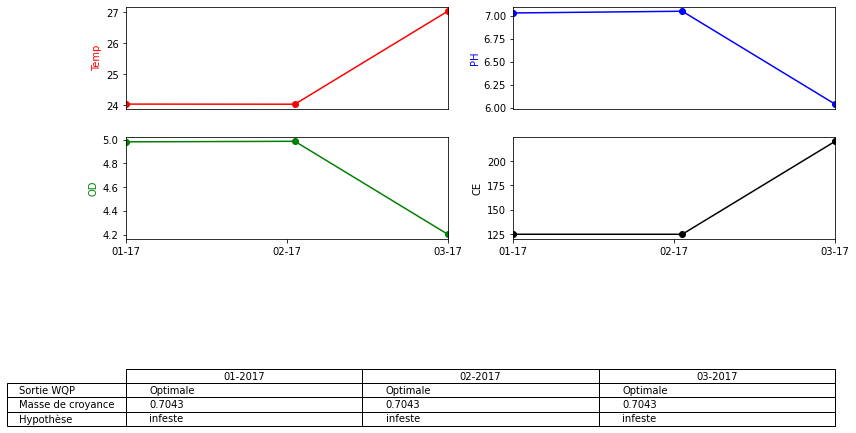

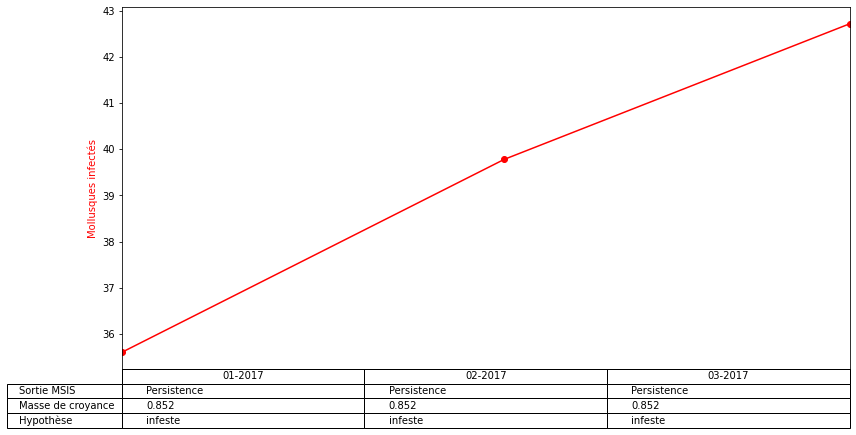

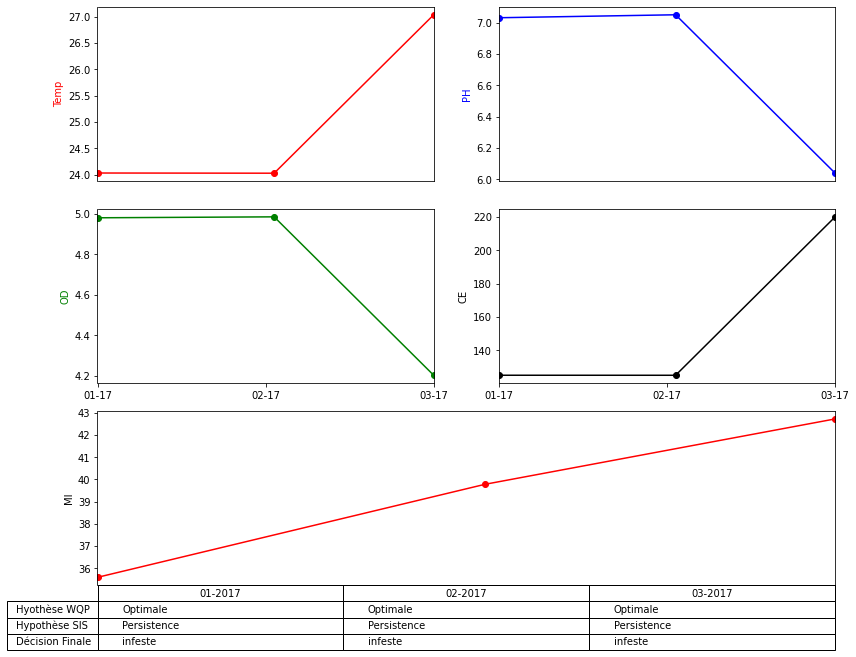

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2222.542333,846.605383,6539.343050,31.386013,32.231359,2269.973053,31,0.506644,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-02,32,2222.332914,846.948495,6549.917766,31.184452,32.413909,2344.782961,32,0.509666,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-03,33,2222.111059,847.304035,6562.531888,30.984617,32.594760,2419.766812,33,0.512662,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-04,34,2221.876746,847.672028,6556.584402,30.785707,32.774711,2494.917440,34,0.515647,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-05,35,2221.629953,848.052494,6550.148418,30.588396,32.953090,2570.232008,35,0.518607,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0


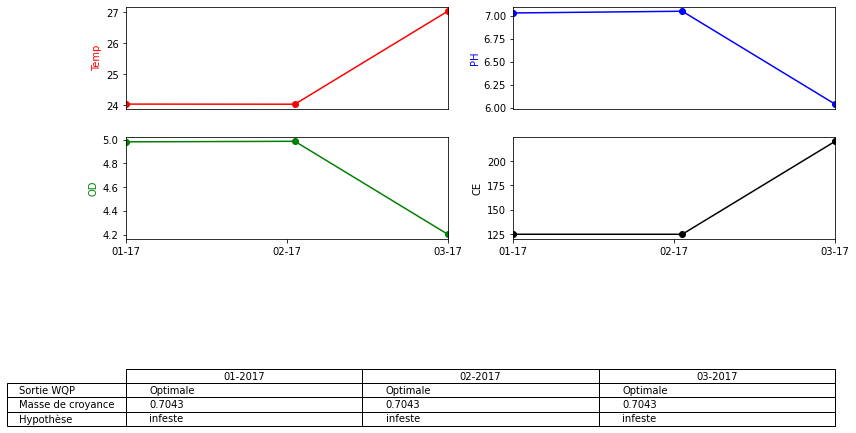

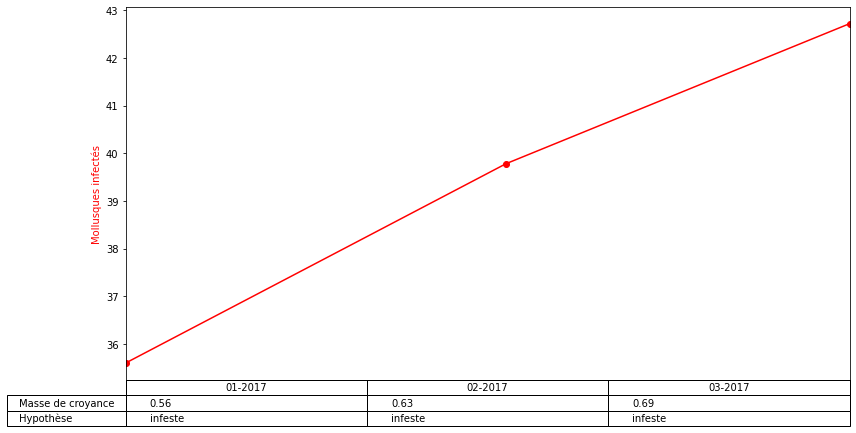

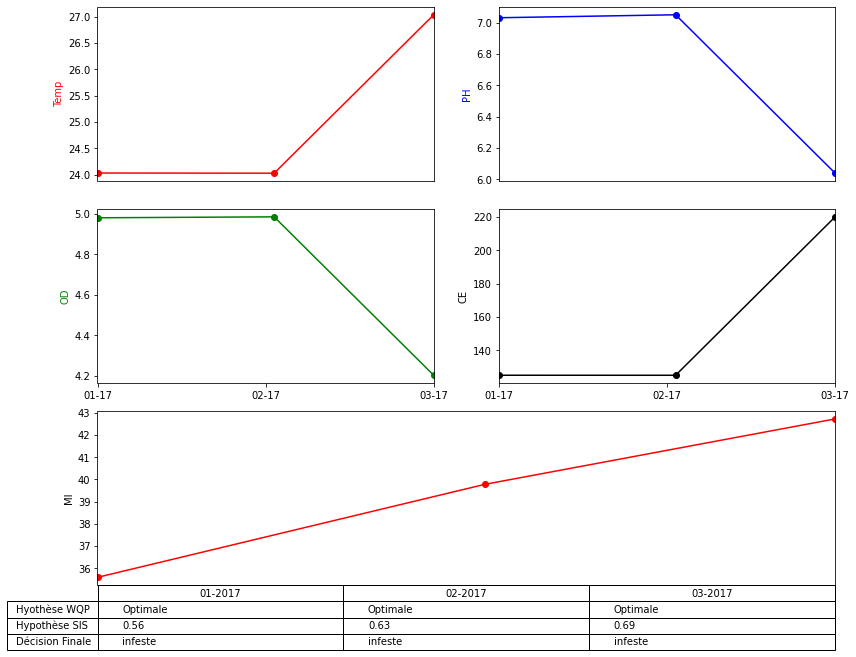

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2222.542333,846.605383,6539.343050,31.386013,32.231359,2269.973053,31,0.506644,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,infeste,0.51,Persistence,infeste,1.0
2017-01-02,32,2222.332914,846.948495,6549.917766,31.184452,32.413909,2344.782961,32,0.509666,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,infeste,0.51,Persistence,infeste,1.0
2017-01-03,33,2222.111059,847.304035,6562.531888,30.984617,32.594760,2419.766812,33,0.512662,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,infeste,0.51,Persistence,infeste,1.0
2017-01-04,34,2221.876746,847.672028,6556.584402,30.785707,32.774711,2494.917440,34,0.515647,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,infeste,0.52,Persistence,infeste,1.0
2017-01-05,35,2221.629953,848.052494,6550.148418,30.588396,32.953090,2570.232008,35,0.518607,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,infeste,0.52,Persistence,infeste,1.0


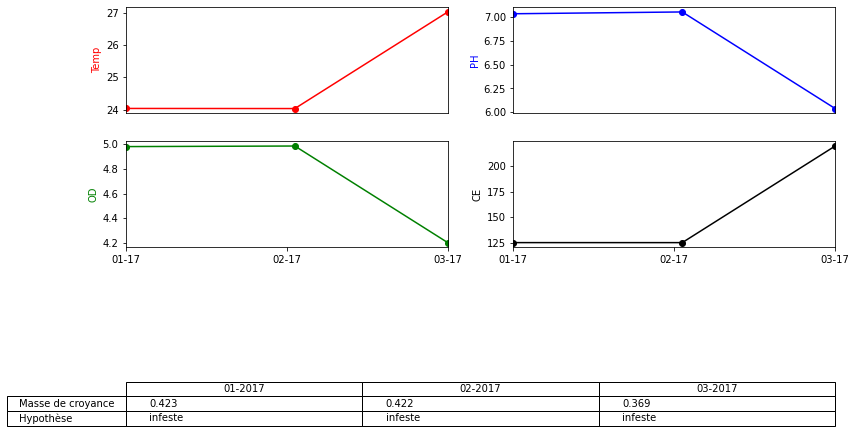

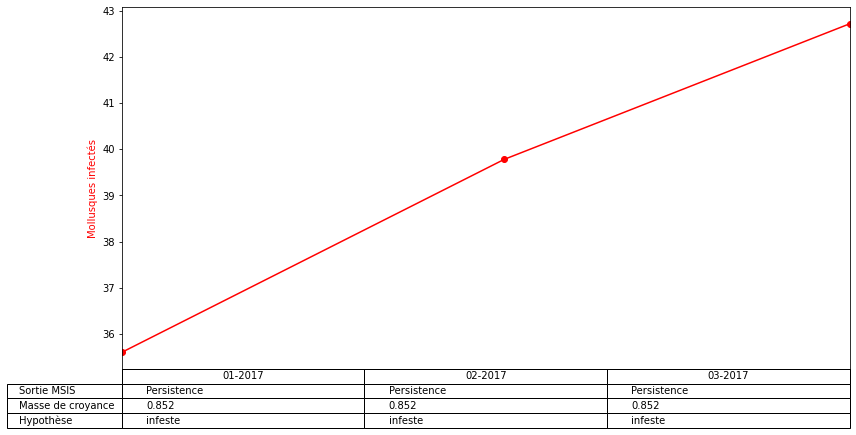

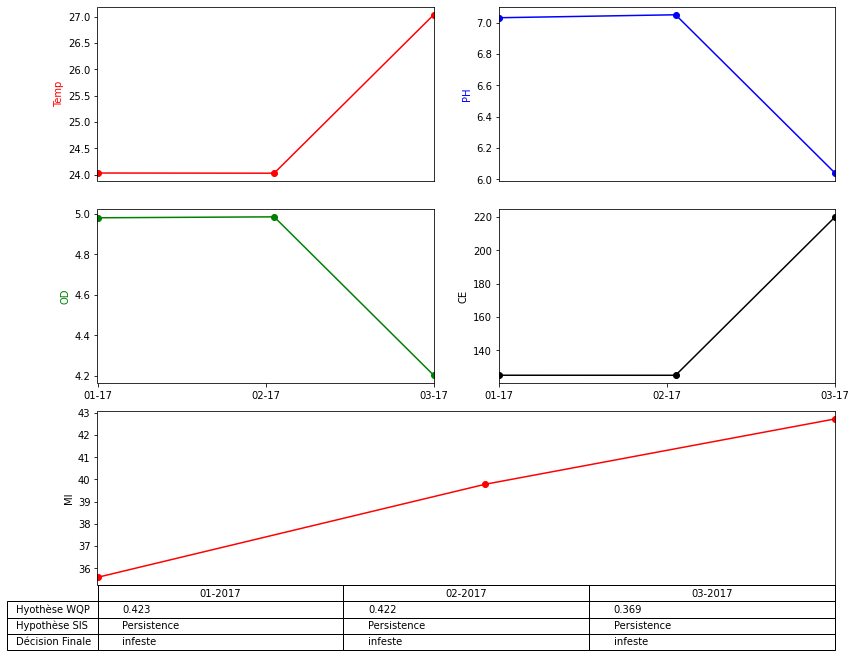

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2222.542333,846.605383,6539.343050,31.386013,32.231359,2269.973053,31,0.506644,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-02,32,2222.332914,846.948495,6549.917766,31.184452,32.413909,2344.782961,32,0.509666,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-03,33,2222.111059,847.304035,6562.531888,30.984617,32.594760,2419.766812,33,0.512662,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-04,34,2221.876746,847.672028,6556.584402,30.785707,32.774711,2494.917440,34,0.515647,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-05,35,2221.629953,848.052494,6550.148418,30.588396,32.953090,2570.232008,35,0.518607,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,infeste,0.8522,Persistence,infeste,1.0


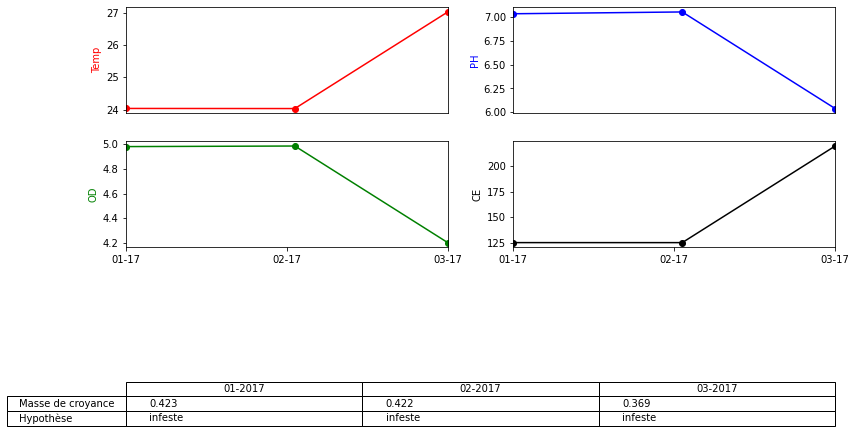

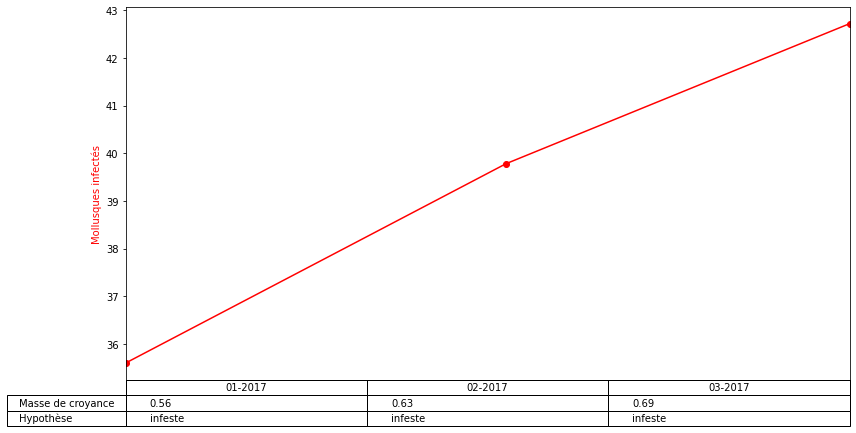

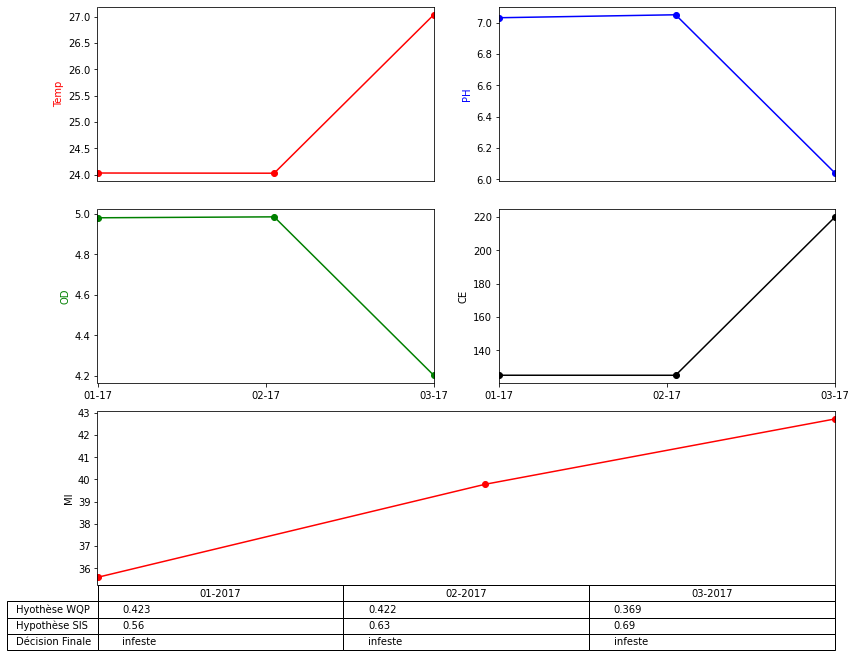

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2222.542333,846.605383,6539.343050,31.386013,32.231359,2269.973053,31,0.506644,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,infeste,0.51,Persistence,infeste,1.0
2017-01-02,32,2222.332914,846.948495,6549.917766,31.184452,32.413909,2344.782961,32,0.509666,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,infeste,0.51,Persistence,infeste,1.0
2017-01-03,33,2222.111059,847.304035,6562.531888,30.984617,32.594760,2419.766812,33,0.512662,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,infeste,0.51,Persistence,infeste,1.0
2017-01-04,34,2221.876746,847.672028,6556.584402,30.785707,32.774711,2494.917440,34,0.515647,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,infeste,0.52,Persistence,infeste,1.0
2017-01-05,35,2221.629953,848.052494,6550.148418,30.588396,32.953090,2570.232008,35,0.518607,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,infeste,0.52,Persistence,infeste,1.0


1.62


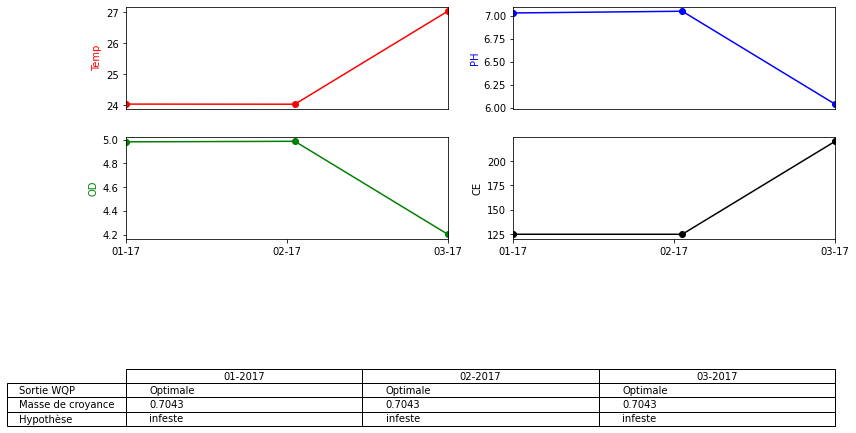

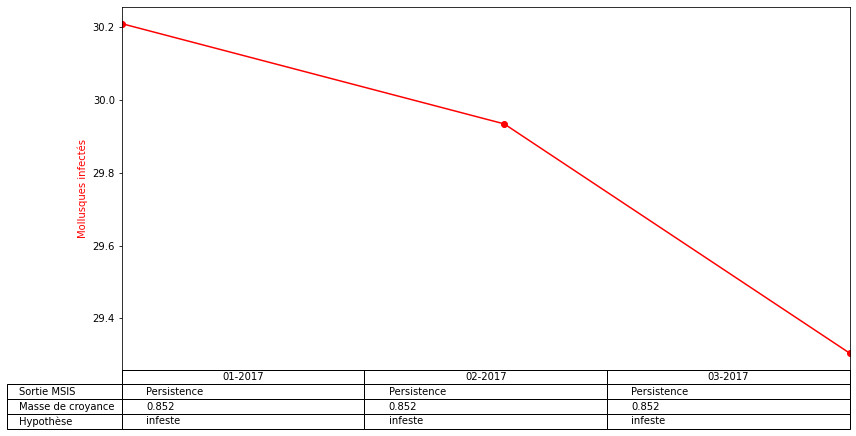

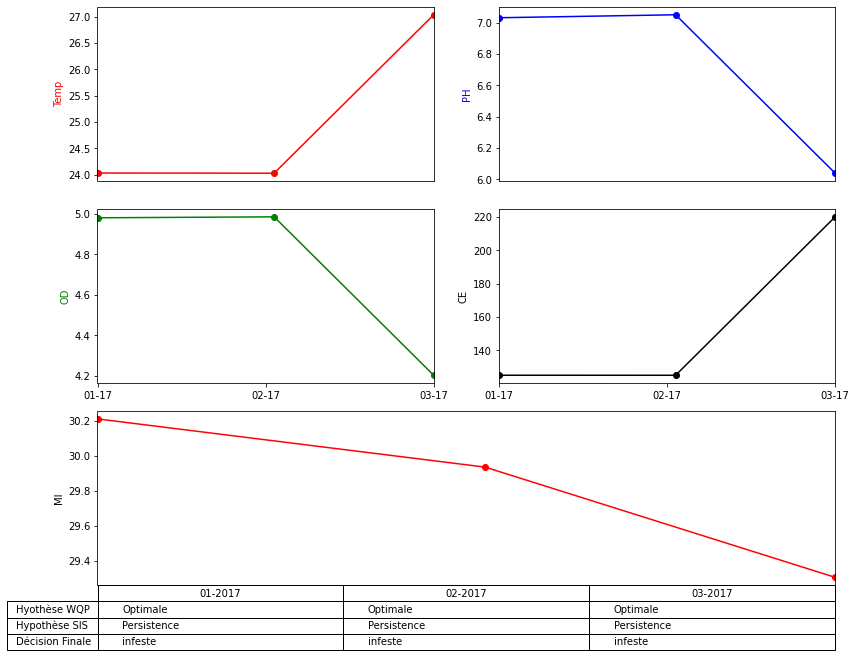

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2764.988677,304.159039,2441.512015,33.923118,29.694254,2198.221152,31,0.466763,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-02,32,2774.652157,294.629252,2368.761553,33.855083,29.743278,2266.561745,32,0.467674,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-03,33,2783.987191,285.427903,2289.781411,33.789782,29.789595,2334.752072,33,0.468542,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-04,34,2793.004560,276.544214,2212.425346,33.727427,29.832992,2402.785856,34,0.469364,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-05,35,2801.714694,267.967753,2149.813730,33.668452,29.873034,2470.657790,35,0.470134,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,infeste,0.8522,Persistence,infeste,1.0


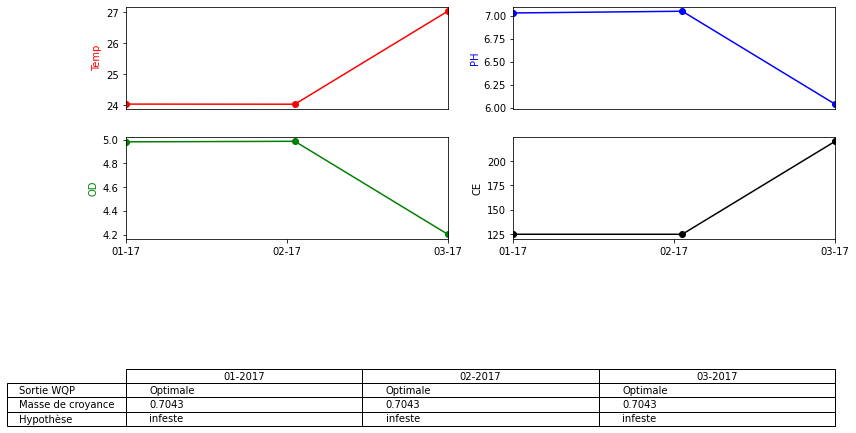

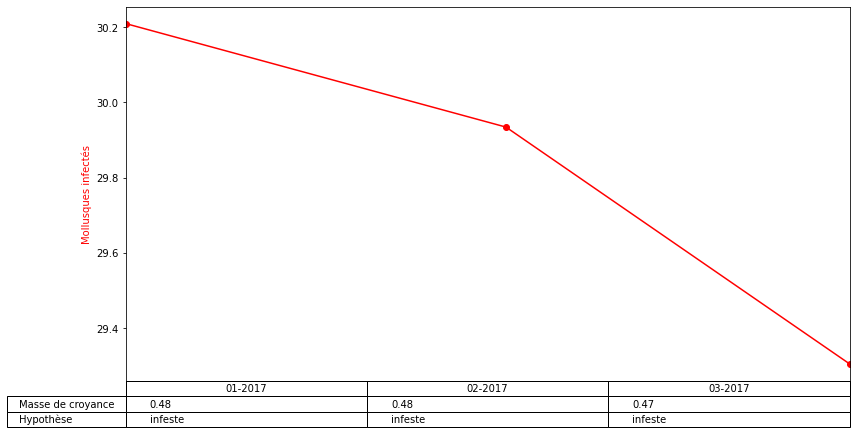

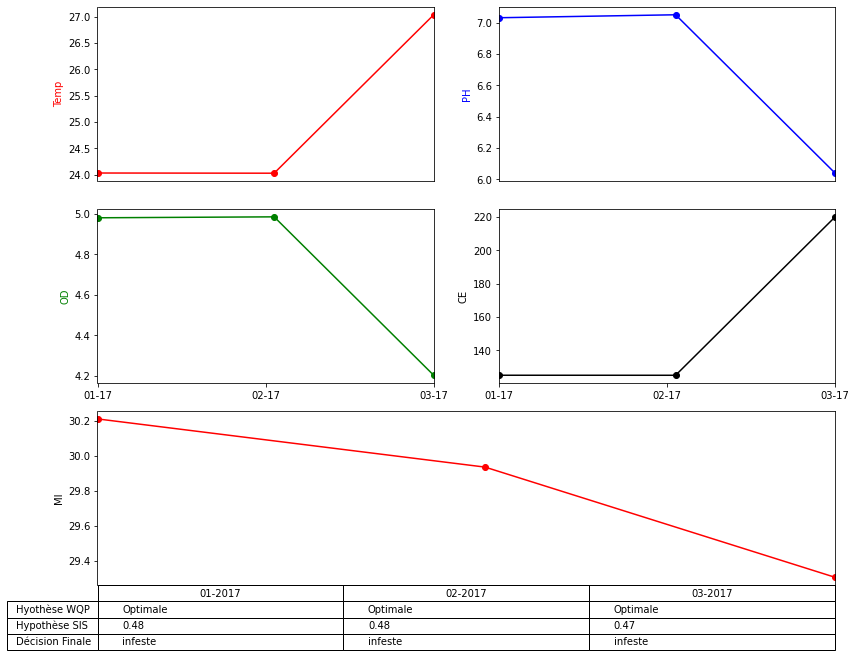

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2764.988677,304.159039,2441.512015,33.923118,29.694254,2198.221152,31,0.466763,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-02,32,2774.652157,294.629252,2368.761553,33.855083,29.743278,2266.561745,32,0.467674,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-03,33,2783.987191,285.427903,2289.781411,33.789782,29.789595,2334.752072,33,0.468542,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-04,34,2793.004560,276.544214,2212.425346,33.727427,29.832992,2402.785856,34,0.469364,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-05,35,2801.714694,267.967753,2149.813730,33.668452,29.873034,2470.657790,35,0.470134,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,infeste,0.47,Persistence,infeste,1.0


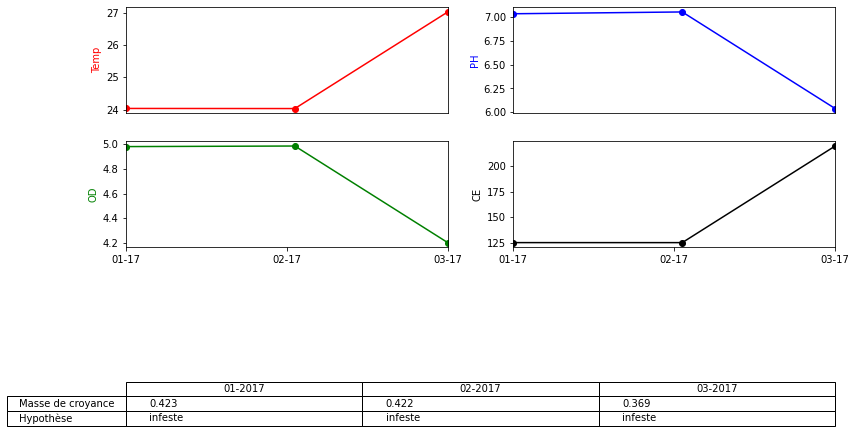

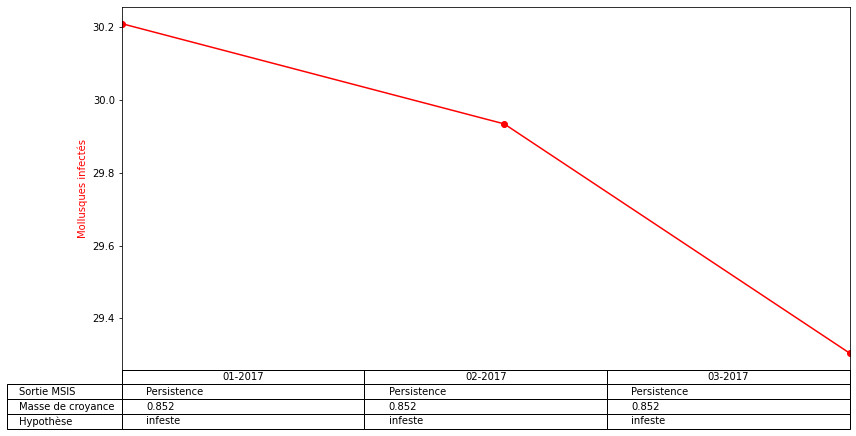

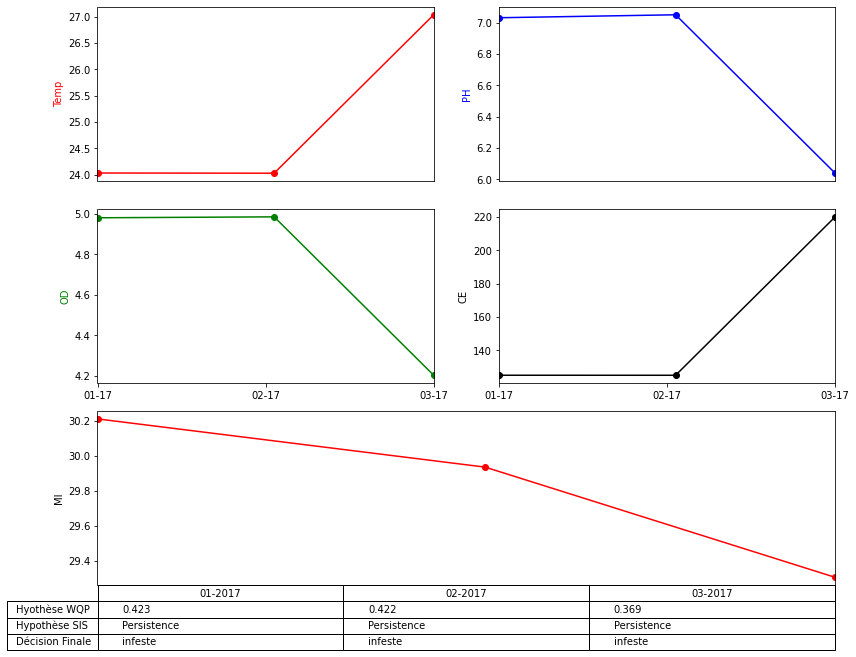

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2764.988677,304.159039,2441.512015,33.923118,29.694254,2198.221152,31,0.466763,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-02,32,2774.652157,294.629252,2368.761553,33.855083,29.743278,2266.561745,32,0.467674,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-03,33,2783.987191,285.427903,2289.781411,33.789782,29.789595,2334.752072,33,0.468542,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-04,34,2793.004560,276.544214,2212.425346,33.727427,29.832992,2402.785856,34,0.469364,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,infeste,0.8522,Persistence,infeste,1.0
2017-01-05,35,2801.714694,267.967753,2149.813730,33.668452,29.873034,2470.657790,35,0.470134,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,infeste,0.8522,Persistence,infeste,1.0


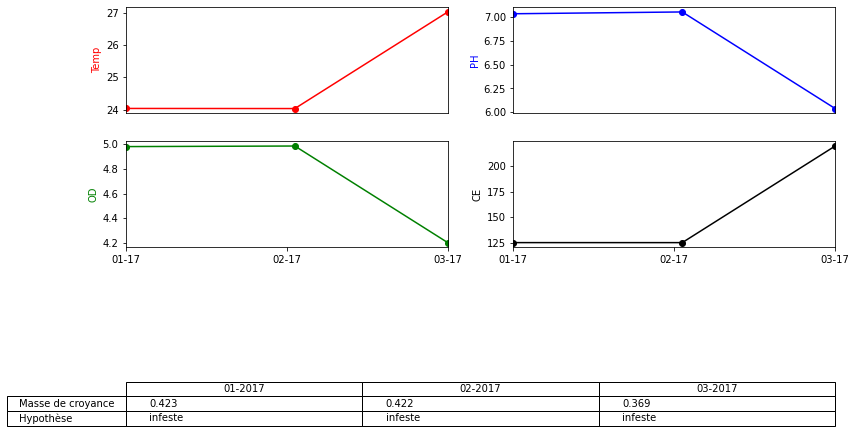

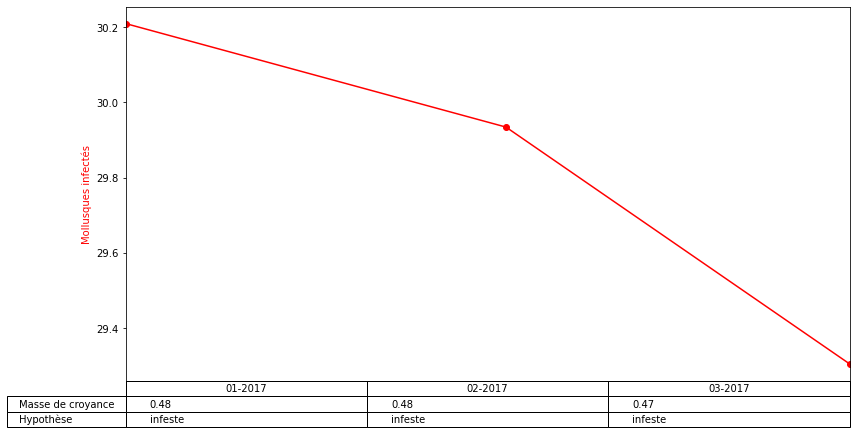

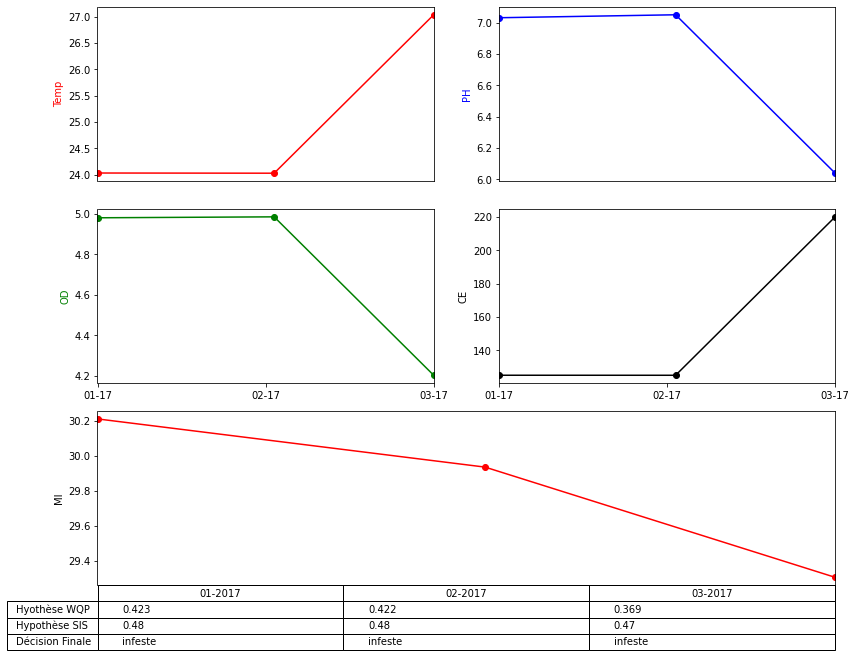

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2764.988677,304.159039,2441.512015,33.923118,29.694254,2198.221152,31,0.466763,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-02,32,2774.652157,294.629252,2368.761553,33.855083,29.743278,2266.561745,32,0.467674,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-03,33,2783.987191,285.427903,2289.781411,33.789782,29.789595,2334.752072,33,0.468542,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-04,34,2793.004560,276.544214,2212.425346,33.727427,29.832992,2402.785856,34,0.469364,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,infeste,0.47,Persistence,infeste,1.0
2017-01-05,35,2801.714694,267.967753,2149.813730,33.668452,29.873034,2470.657790,35,0.470134,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,infeste,0.47,Persistence,infeste,1.0


0


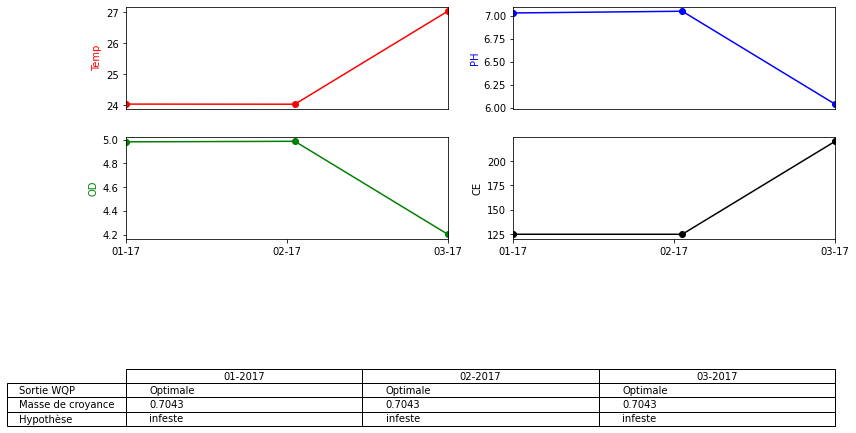

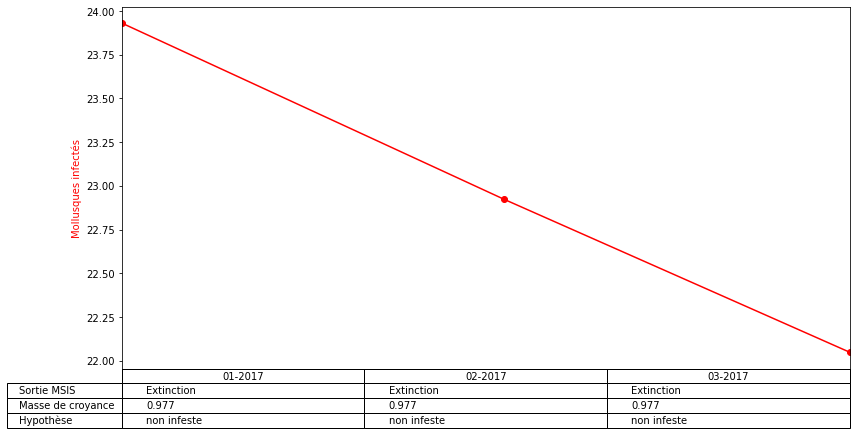

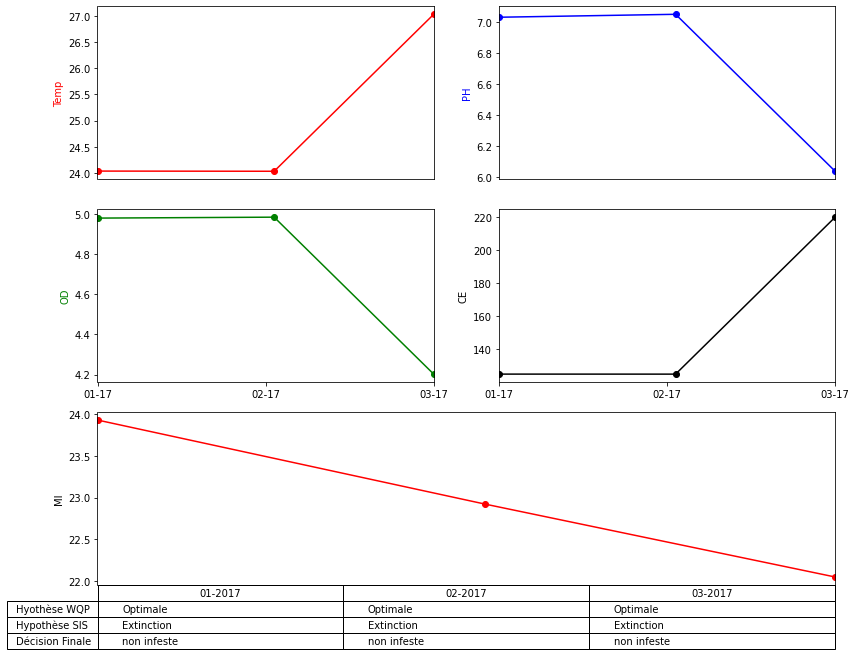

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2228.469936,840.677780,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-02,32,2228.644812,840.636596,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-03,33,2228.819681,840.595414,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-04,34,2228.994541,840.554233,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-05,35,2229.169392,840.513055,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134


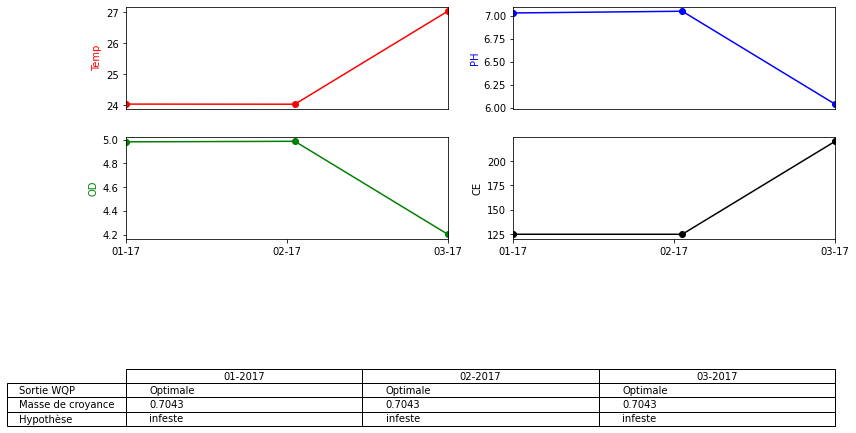

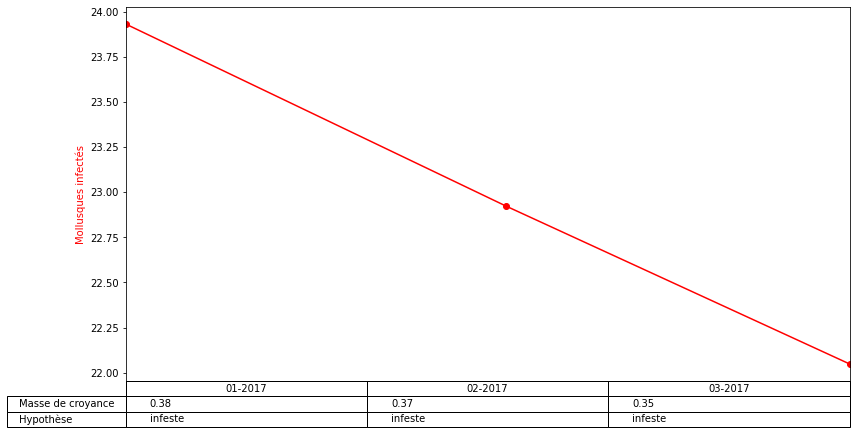

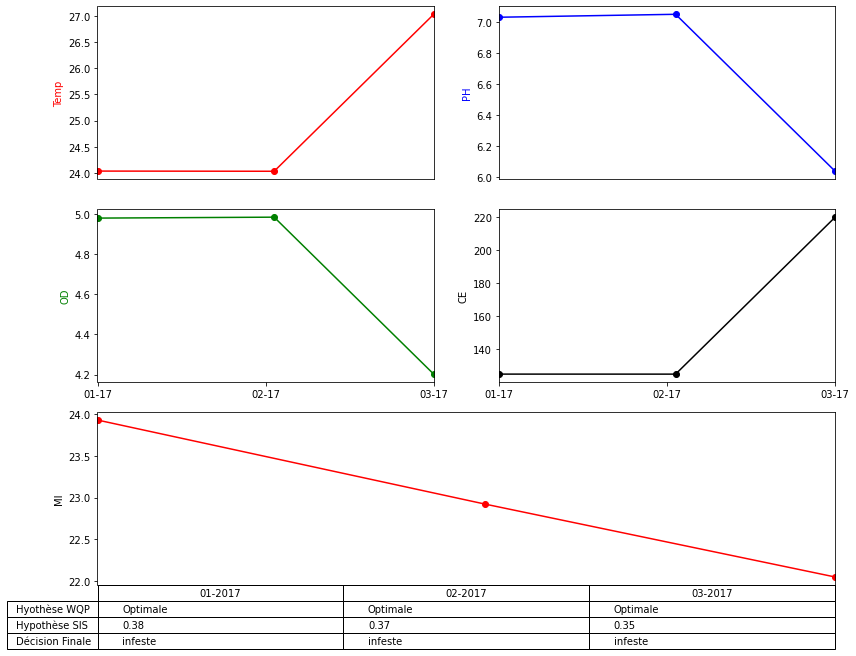

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2228.469936,840.677780,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-02,32,2228.644812,840.636596,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-03,33,2228.819681,840.595414,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-04,34,2228.994541,840.554233,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-05,35,2229.169392,840.513055,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0


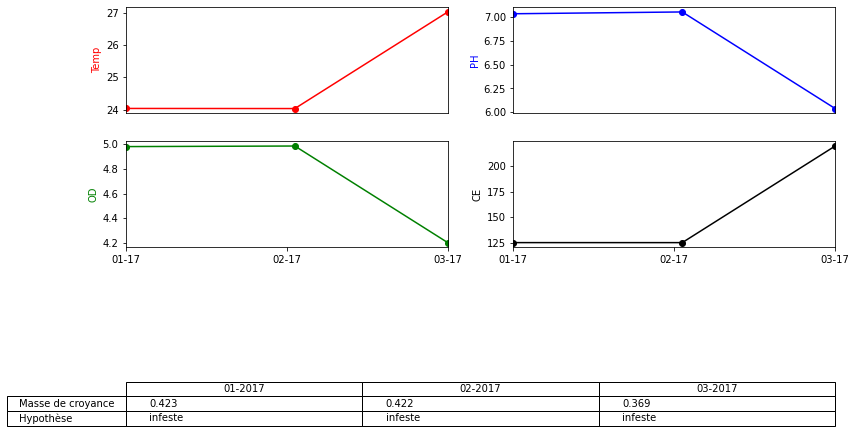

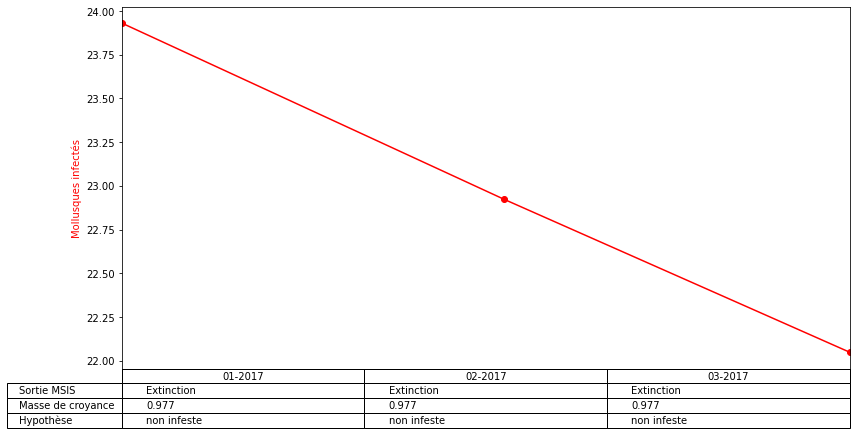

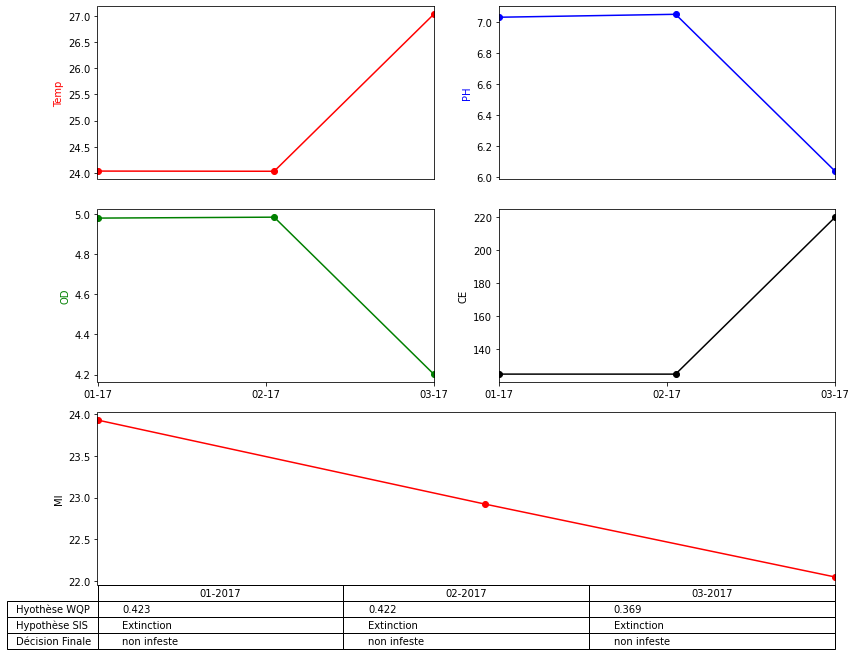

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2228.469936,840.677780,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-02,32,2228.644812,840.636596,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-03,33,2228.819681,840.595414,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-04,34,2228.994541,840.554233,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-05,35,2229.169392,840.513055,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485


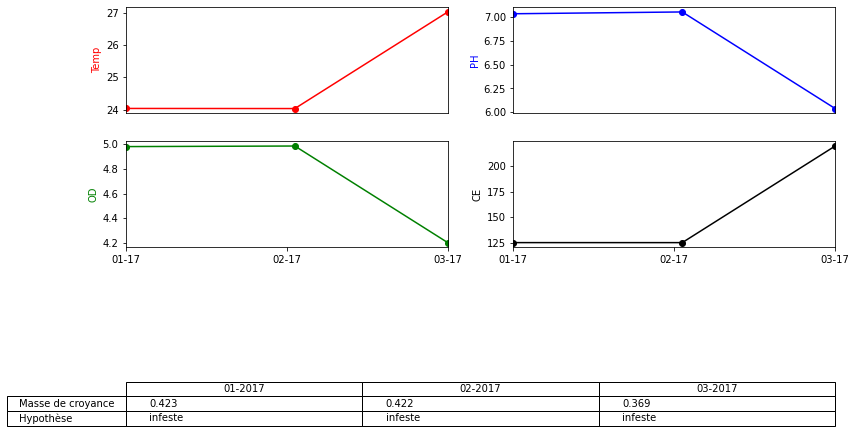

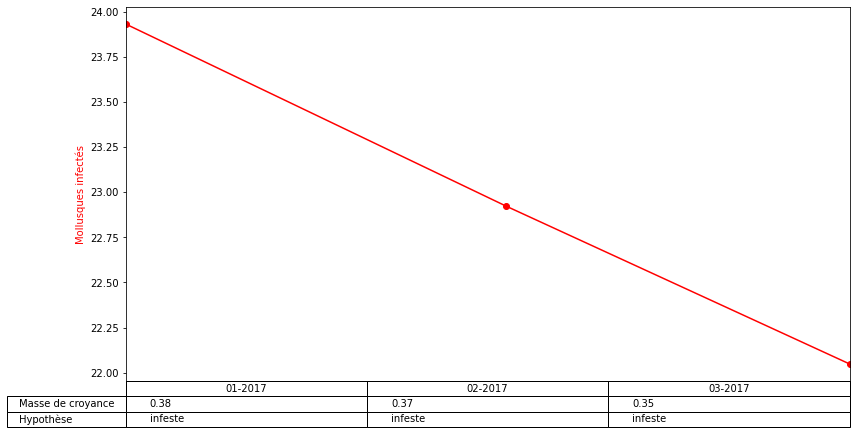

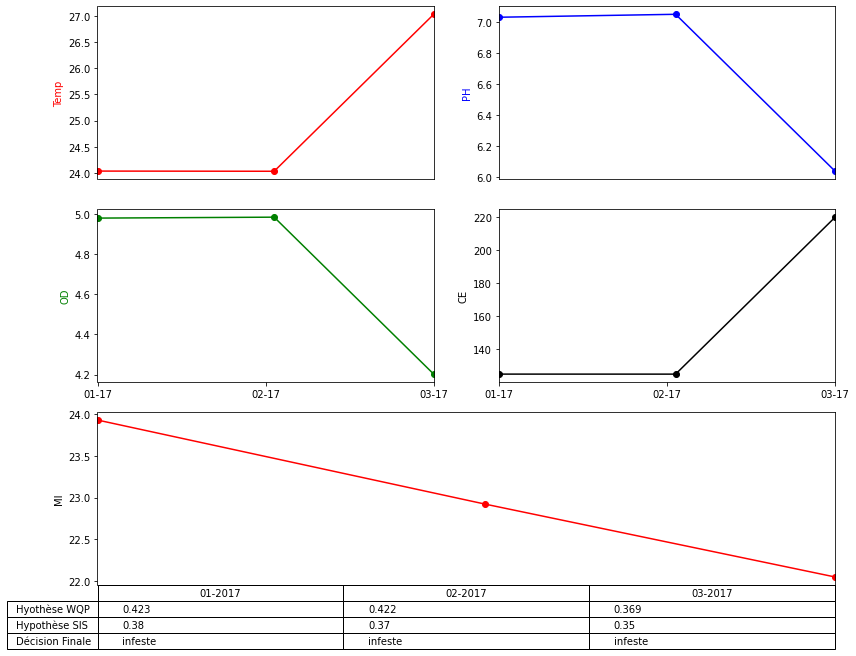

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2228.469936,840.677780,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-02,32,2228.644812,840.636596,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-03,33,2228.819681,840.595414,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-04,34,2228.994541,840.554233,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-05,35,2229.169392,840.513055,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,infeste,0.39,Extinction,infeste,1.0


0


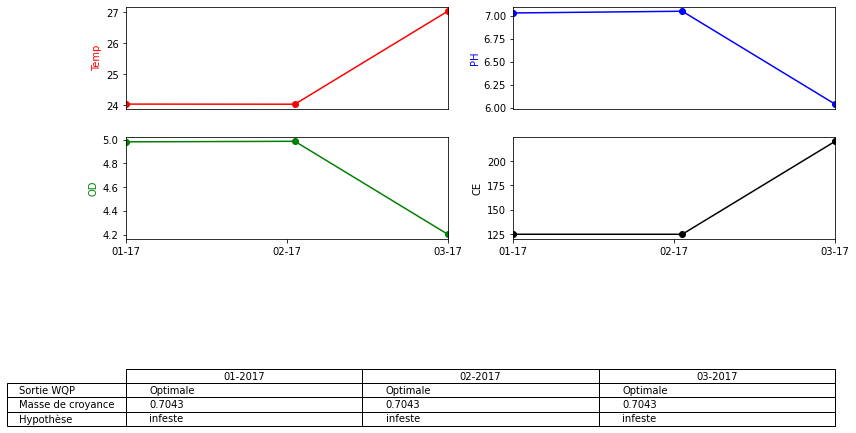

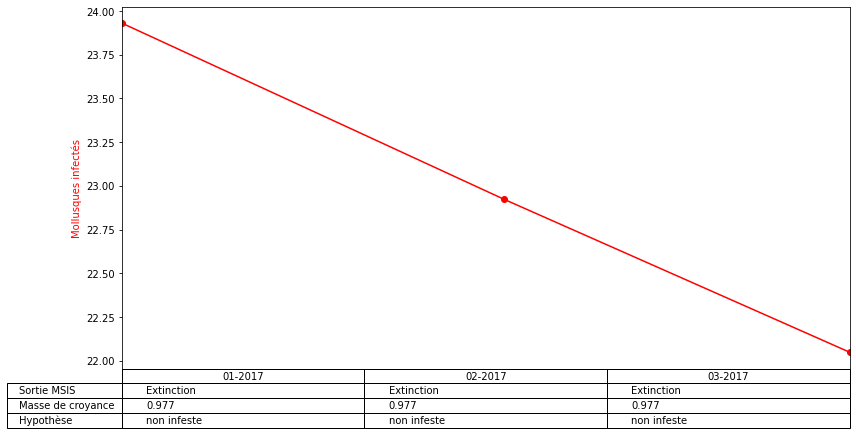

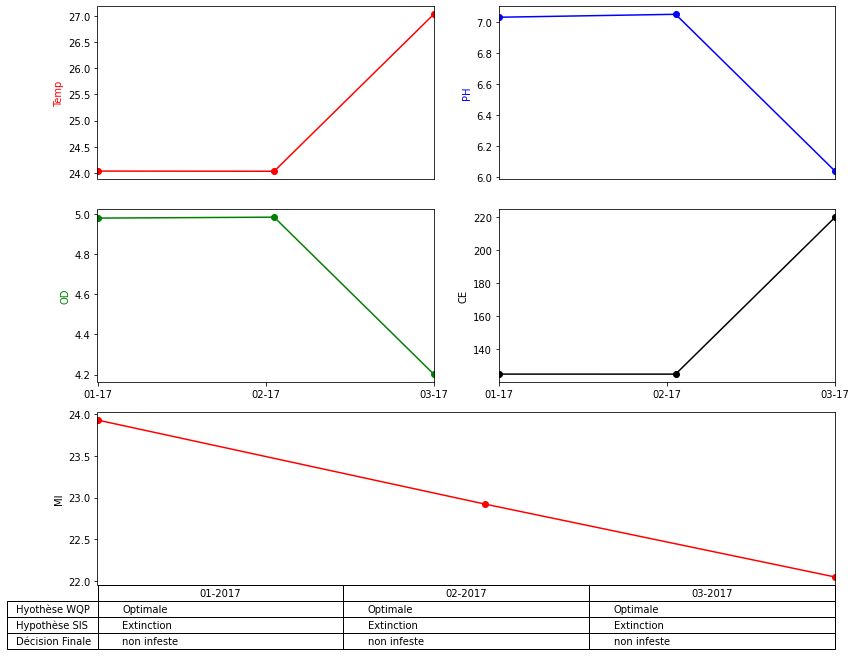

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2770.095417,299.052299,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-02,32,2780.092255,289.189153,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-03,33,2789.765611,279.649483,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-04,34,2799.124371,270.424403,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134
2017-01-05,35,2808.177338,261.505109,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,non infeste,0.9773,Extinction,non infeste,0.948134


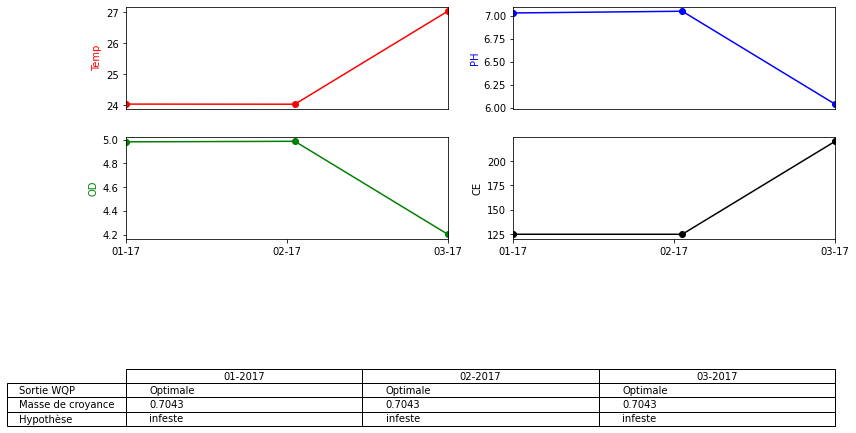

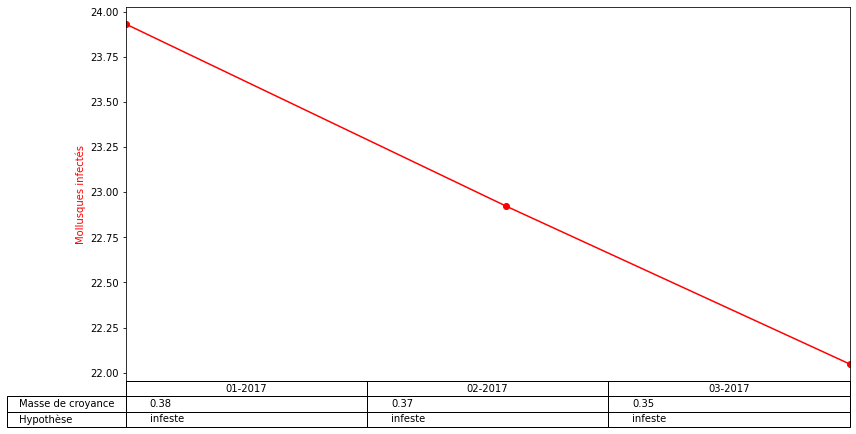

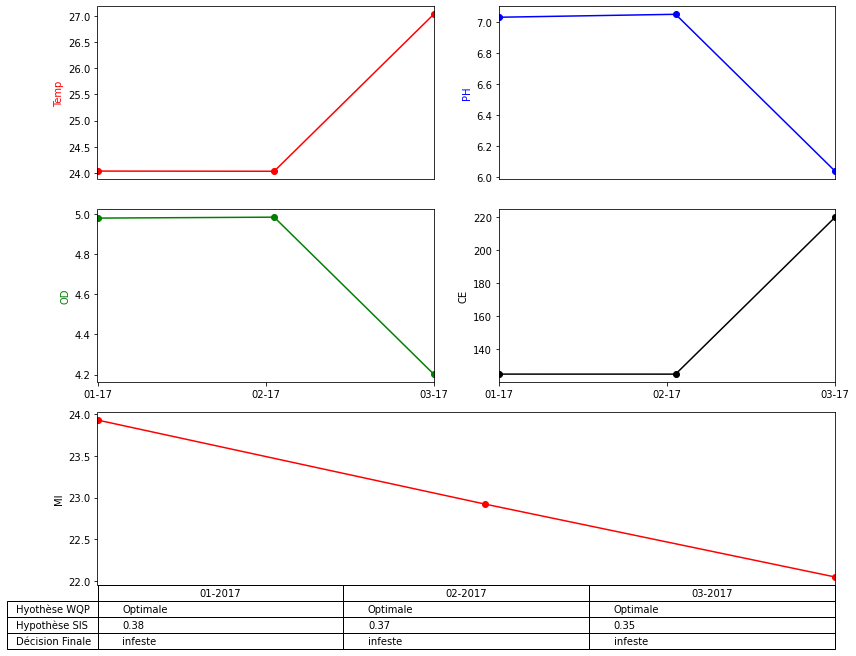

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2770.095417,299.052299,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-02,32,2780.092255,289.189153,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-03,33,2789.765611,279.649483,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-04,34,2799.124371,270.424403,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-05,35,2808.177338,261.505109,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.7043,Optimale,infeste,0.39,Extinction,infeste,1.0


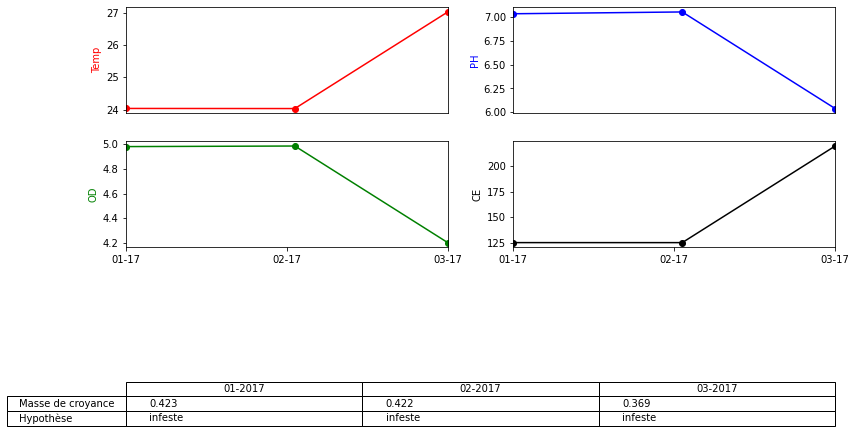

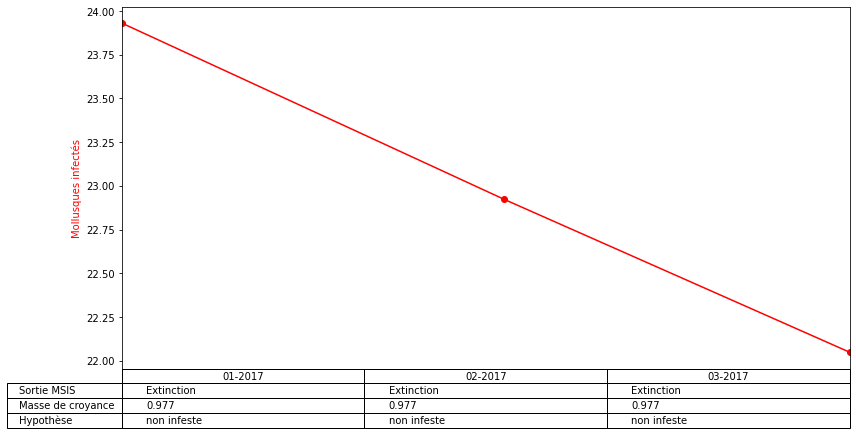

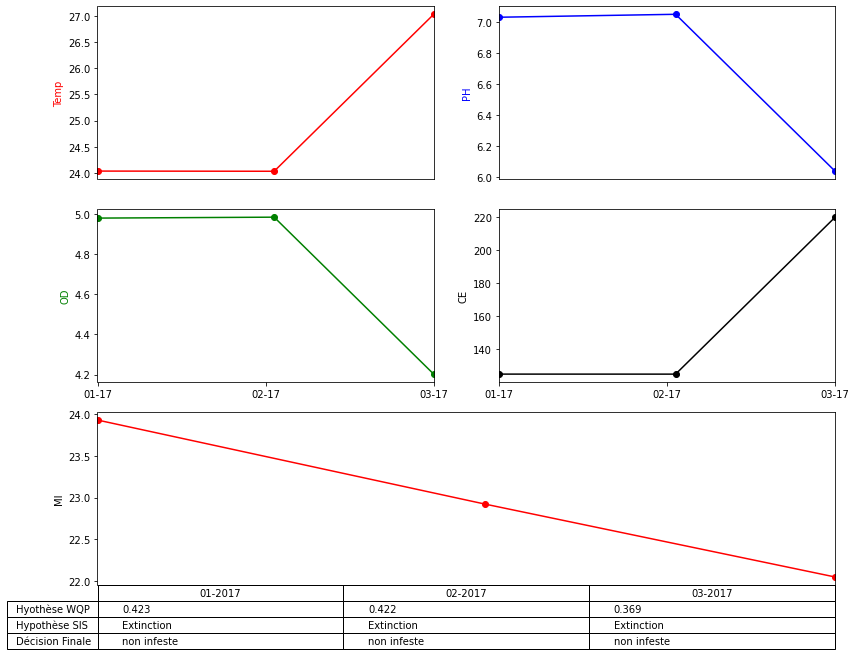

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2770.095417,299.052299,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-02,32,2780.092255,289.189153,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-03,33,2789.765611,279.649483,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-04,34,2799.124371,270.424403,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485
2017-01-05,35,2808.177338,261.505109,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,non infeste,0.9773,Extinction,non infeste,0.983485


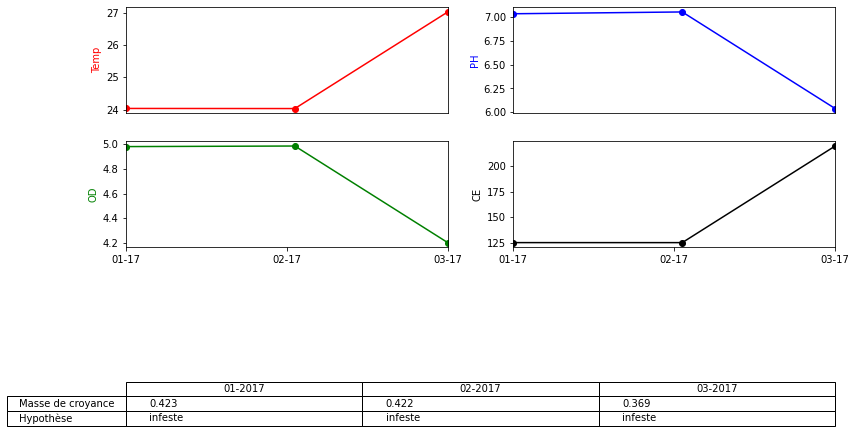

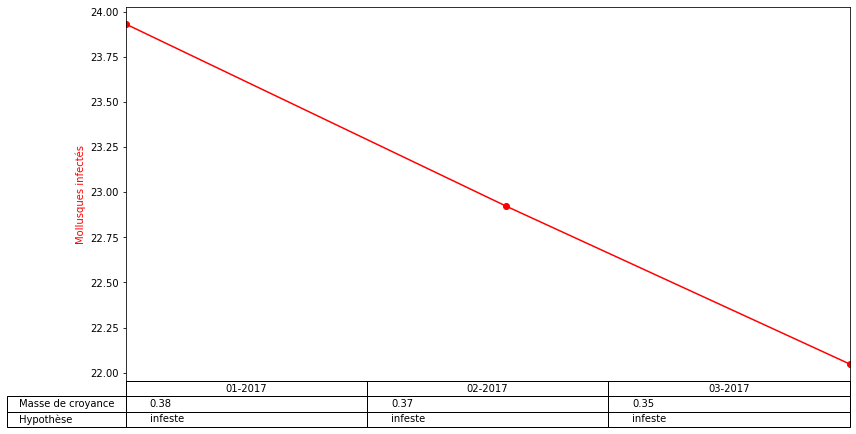

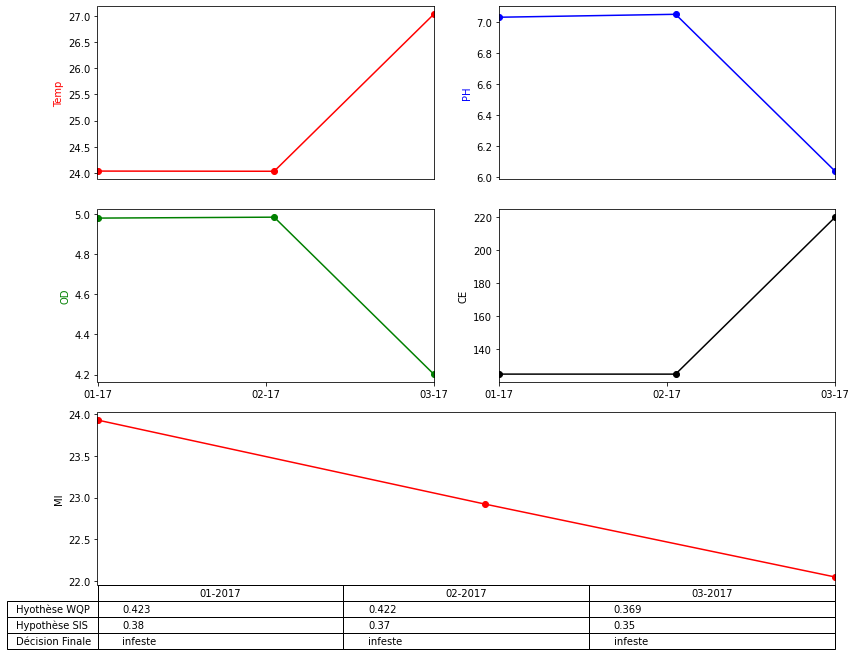

,Unnamed: 0,Humains susceptibles,Humains infectés,Mirracidiums,Mollusques susceptibles,Mollusques infectés,Cercaires,deltaT,Taux,periode,...,DO,EC,EtatML,ValDecML,sortieML,EtatMM,valDecMM,sortieMM,EtatFusion,ValDecFusion
period,,,,,,,,,,,,,,,,,,,,,
2017-01-01,31,2770.095417,299.052299,0.0,39.011911,24.605461,0.0,31,0.386773,2017-01-01,...,4.981674,125.031930,infeste,0.422260,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-02,32,2780.092255,289.189153,0.0,39.027051,24.571310,0.0,32,0.386351,2017-01-02,...,4.979781,125.035934,infeste,0.421874,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-03,33,2789.765611,279.649483,0.0,39.042169,24.537207,0.0,33,0.385930,2017-01-03,...,4.978826,125.026930,infeste,0.421648,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-04,34,2799.124371,270.424403,0.0,39.057267,24.503151,0.0,34,0.385510,2017-01-04,...,4.980041,125.032490,infeste,0.421566,Optimale,infeste,0.39,Extinction,infeste,1.0
2017-01-05,35,2808.177338,261.505109,0.0,39.072344,24.469143,0.0,35,0.385089,2017-01-05,...,4.980765,125.014680,infeste,0.422465,Optimale,infeste,0.39,Extinction,infeste,1.0


In [16]:
import pickle
import warnings
warnings.filterwarnings("ignore")
import math

model = pickle.load(open('/gdrive/MyDrive/traitement_ordinaire/RegressionLineaire08_Aug_2022_18_49/regressor4params', 'rb'))

scenari=["scenario1","scenario2","scenario5","scenario6"]

for sc in scenari :
  df,r0=formationJeuDonnees(sc)
  # wqp=int(input("1-Via qualité 2-Via Regression"))
  for wqp in range(1,3):

    for approcheR0 in range(1,4,2):

      # approcheR0=int(input("1-simple R0 2-Taux equilbres 3-Taux dynamiques"))

      #Assignation - Combinaison et Décision
      colonneDecisionFusion=[]
      colonneValFusion=[]
      colonneDecisionML=[]
      colonneSortieML=[]
      colonneValDecML=[]
      colonneDecisionMM=[]
      colonneValDecMM=[]
      colonneSortieMM=[]

      # for t,ph,ec,od, taux in zip(df['TEMP'],df['PH'],df['EC'],df['D0'],df['Taux']):
      for t,ph,ec,od, taux in zip(df['TEMP'],df['PH'],df['EC'],df['DO'],df['Taux']):
        if wqp==1:
          if (t<18 or t>32) or (ph<4 or ph>10):
            # print("letal")
            noninfeste=1
            infeste=0
            omega=1-noninfeste
            colonneSortieML.append("Létale")
            
          elif (t>=25 and t<=28) or (ph>=6.5 and ph<=8.2):
            # print("optimale")
            noninfeste=0
            infeste=70.43/100.0
            omega=1-infeste
            colonneSortieML.append("Optimale")

          else:
            # print("Favorable")
            noninfeste=0
            infeste=29.57/100.0
            omega=1-infeste
            colonneSortieML.append("Favorable")

          if(max(noninfeste,infeste)==infeste):
              etatEauML="infeste"
              valEtatML=infeste
              colonneDecisionML.append(etatEauML)
              colonneValDecML.append(valEtatML)
              # colonneSortieML.append("")
          if(max(noninfeste,infeste)==noninfeste):
            etatEauML="non infeste"
            valEtatML=noninfeste
            colonneDecisionML.append(etatEauML)
            colonneValDecML.append(valEtatML)

        if wqp==2:
          infeste=model.predict([[ph,ec,t,(od*6)/50]])[0] # On multiplie le DO * 6 et on divise par 50 pour passer de saturation en % en teneur mg/L. C'est tiré de la fiche tecnique de l'équipement
          noninfeste=0
          omega=1-infeste

          if(infeste==0):
            etatEauML="non infeste"
            valEtatML=infeste
            colonneDecisionML.append(etatEauML)
            colonneValDecML.append(valEtatML)
          else:
            etatEauML="infeste"
            valEtatML=infeste
            colonneDecisionML.append(etatEauML)
            colonneValDecML.append(valEtatML)

        
        listemasses1={'A':round(infeste,3),'B':round(noninfeste,3),'A_B':round(omega,3)}
        listemasses1=affaiblissement(listemasses1,0)


        if approcheR0==1:

          if (r0>1):
            noninfeste2=0
            infeste2=85.22/100.0
            omega2=1-infeste2
            colonneSortieMM.append("Persistence")
            etatEauMM="infeste"
            valEtatMM=infeste2
            colonneDecisionMM.append(etatEauMM)
            colonneValDecMM.append(valEtatMM)

          if (r0<1):
            noninfeste2=1-(2.27/100.0)
            infeste2=0
            omega2=1-noninfeste2
            colonneSortieMM.append("Extinction")
            etatEauMM="non infeste"
            valEtatMM=noninfeste2
            colonneDecisionMM.append(etatEauMM)
            colonneValDecMM.append(valEtatMM)
          

          if (r0==1):
            noninfeste2=0.5
            infeste2=0.5
            omega2=0
            colonneSortieMM.append("Indécis")
            etatEauMM="Indecis"
            valEtatMM=noninfeste2
            colonneDecisionMM.append(etatEauMM)
            colonneValDecMM.append(valEtatMM)

        if approcheR0==3:
          if round(taux,1)==0:
            etatEauMM="non infeste"

            noninfeste2=1
            infeste2=0
            omega2=1-noninfeste2
            valEtatMM=noninfeste2

            colonneDecisionMM.append(etatEauMM)
            colonneValDecMM.append(valEtatMM)
          else:
            etatEauMM="infeste"

            infeste2=round(taux,2) 
            noninfeste2=0
            omega2=1-infeste2
            valEtatMM=infeste2

            colonneDecisionMM.append(etatEauMM)
            colonneValDecMM.append(valEtatMM)


        listemasses2={'A':round(infeste2,3),'B':round(noninfeste2,3),'A_B':round(omega2,3)}
        listemasses2=affaiblissement(listemasses2,0)

        #APPEL FONCTION COMBINAISON
        matricefusion, listesmasses12 = Combinaison(listemasses1,listemasses2)
        #APPEL FONCTION AFFICHAGE
        affichagematricefusion(matricefusion,listemasses1,listemasses2)
        #APPEL FONCTION DECISON
        val,etateau =decision(listesmasses12)
        colonneValFusion.append(val)
        colonneDecisionFusion.append(etateau)


        #Ajout de nouvelles colonnes au dataframe
      if wqp==1:
        df=df.assign(EtatML=colonneDecisionML,ValDecML=colonneValDecML,sortieML=colonneSortieML)
      
      if wqp==2:
        df=df.assign(EtatML=colonneDecisionML,ValDecML=colonneValDecML)
        
      if approcheR0==1:
        df=df.assign(EtatMM=colonneDecisionMM, valDecMM=colonneValDecMM,sortieMM=colonneSortieMM)
      
      if approcheR0==3:
        df=df.assign(EtatMM=colonneDecisionMM, valDecMM=colonneValDecMM)
      
      df=df.assign(EtatFusion=colonneDecisionFusion,ValDecFusion=colonneValFusion)

      predmois = df.loc[['2017-01-21','2017-02-21','2017-03-21']]
      predmoisEntites=predmois.loc[:,~predmois.columns.str.contains("Fusion|ML|MM")]

      tracerCourbes(predmois,sc,wqp,approcheR0)

      display(df.head(5))

In [ ]:
# #Restreindre aux jours prédits
# import matplotlib.pyplot as plt

# predmois = df.loc[['2017-01-21','2017-02-21','2017-03-21']]
# # print(predmois.loc[:,predmois.columns.str.contains("Fusion|ML|MM")].to_latex(index = True, multirow = True))
# predmoisEntites=predmois.loc[:,~predmois.columns.str.contains("Fusion|ML|MM")]
# # predmoisEntites['Cercaires'].plot()

# def predmodel(predmois,motcle):
#   predmois = df.loc[['2017-01-21','2017-02-21','2017-03-21']]
#   # predmois[['EtatML','Mollusques infectés']]
#   predmoisresults=predmois.loc[:,predmois.columns.str.contains(motcle)].reset_index(drop=False)
#   print(predmoisresults.to_latex(index = True, multirow = True))